**Libraries**

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import time

**Volcano plot**


-----------------------------------------------------------------------

                 p_values  fold_change
Cell type                             
3.8-1.2      7.575100e-01     0.386410
3.8-1.3      8.503194e-03     3.013131
3.8-1.4      4.539029e-01     0.943119
3.8-1.5      1.150533e-01     4.136450
5-HT3C2      1.231468e-03     1.270829
...                   ...          ...
ZYX          0.000000e+00    -1.299750
ZZEF1        1.045636e-09     0.179578
ZZZ3         9.950252e-21     0.227067
bA255A11.4   1.424001e-01    -1.289003
bA395L14.12  2.075226e-01     0.271316

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                p_values  fold_change
Cell type                            
AASS       8.521644e-190     3.087531
ABCA8      3.102385e-146     6.479768
ABCA9-AS1   1.973778e-05     2.310001
ABCB5       4.221619e-60     3.682017
ABCC13      2.901941e-04     3.187493
...                  ...        

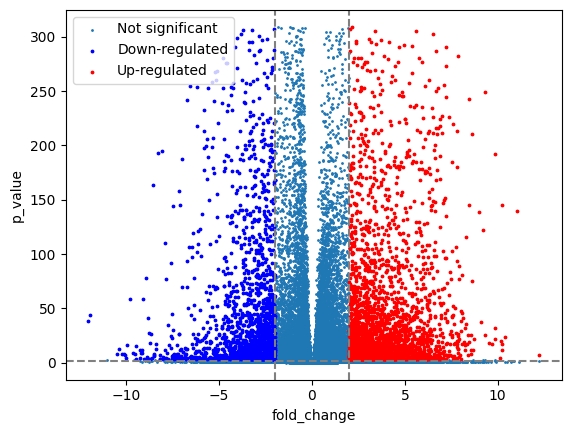


-----------------------------------------------------------------------

                  p_values  fold_change
Cell type                              
3.8-1.2       4.003867e-01    -1.066965
3.8-1.3       9.848690e-01     0.016156
3.8-1.4       2.662282e-01    -1.634398
3.8-1.5       7.238870e-01     0.485576
5-HT3C2       3.578023e-01    -0.311411
...                    ...          ...
ZYX          7.541807e-150     0.816472
ZZEF1         2.566623e-04    -0.102851
ZZZ3          3.584937e-08     0.123520
bA255A11.4    3.639493e-01     0.979205
bA395L14.12   7.968127e-02    -0.337267

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                  p_values  fold_change
Cell type                              
AADAC         1.491851e-04     3.862458
AADACL2       1.539727e-14     2.439183
AADACL2-AS1   4.487761e-27     2.446090
AASS         1.928911e-167     2.329302
ABCA8        1.596846e-135     4.564230
...  

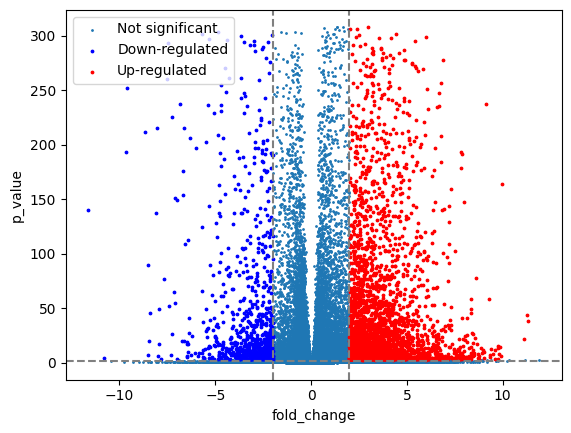


-----------------------------------------------------------------------

                  p_values  fold_change
Cell type                              
3.8-1.2       4.929293e-02     4.749263
3.8-1.3       2.974140e-02    -3.561008
3.8-1.4       1.145004e-02     5.514622
3.8-1.5       1.915192e-01    -4.501035
5-HT3C2       2.027073e-02    -1.752493
...                    ...          ...
ZYX          7.420138e-257     2.374196
ZZEF1         9.159464e-04    -0.228702
ZZZ3          9.480177e-37    -0.683977
bA255A11.4    4.990089e-02     1.569786
bA395L14.12   9.592517e-01     0.030355

[48702 rows x 2 columns]

-----------------------------------------------------------------------

Genes up-regulated 

                p_values  fold_change
Cell type                            
AA06        3.727586e-21          inf
AACSP1      2.670156e-58     3.570403
AARD       4.776832e-120     4.036164
ABCA10      0.000000e+00     3.139873
ABCA6      2.256396e-100     2.289107
...                

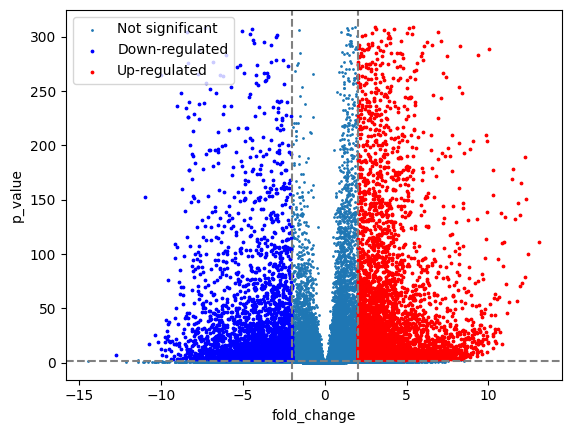

Finished


In [6]:
# Paths

paths_files="/content/drive/MyDrive/Cell_Proportion/Parameters/"

 # Name of each file

file_name=[
    "Exc",
    "Inh",
    "Non-neuronal"
]


for phenotype in file_name:

    gene_expr=pd.read_csv(paths_files+phenotype+"_pvalue_foldchange.csv", index_col=0)
    #gene_expr=gene_expr[["p_values","fold_change"]]
    print("\n-----------------------------------------------------------------------\n")
    print(gene_expr)



    plt.scatter(x=gene_expr['fold_change'],y=gene_expr['p_values'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

    # highlight down- or up- regulated genes
    down = gene_expr[(gene_expr['fold_change']<=-2)&(gene_expr['p_values']<=0.001)] #Only genes with p_value less than or equal to 0.001 will be plotted for down genes.
    up = gene_expr[(gene_expr['fold_change']>=2)&(gene_expr['p_values']<=0.001)] #Only genes with p_value less than or equal to 0.001 will be plotted for up genes.

    #Plot the data
    plt.scatter(x=down['fold_change'],y=down['p_values'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    plt.scatter(x=up['fold_change'],y=up['p_values'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

    plt.xlabel("fold_change")
    plt.ylabel("p_value")
    plt.axvline(-2,color="grey",linestyle="--")
    plt.axvline(2,color="grey",linestyle="--")
    plt.axhline(2,color="grey",linestyle="--")
    plt.legend()

    print("\n-----------------------------------------------------------------------\n")
    print("Genes up-regulated \n")
    print(up)
    # Save the up regulated genes
    #up.to_csv(phenotype+"_up.csv")

    print("\n-----------------------------------------------------------------------\n")
    print("Genes down-regulated \n")
    print(down)
    #Save the down regulared genes
    #down.to_csv(phenotype+"_down.csv")

    # Save the volcano plot figure
    #plt.savefig(phenotype+"_volcano_plot.jpg")
    print("\n-----------------------------------------------------------------------\n")
    print("Volcano Plot for: "+phenotype)
    print("\n-----------------------------------------------------------------------\n")
    plt.show()

print("Finished")